In [1]:
#!/usr/bin/env python

### Install LibSVM Python library

In [2]:
!git clone https://github.com/cjlin1/libsvm
%cd libsvm/
!make && make install
%cd /notebooks/libsvm/python/
!make
import sys
sys.path.append('/notebooks/libsvm/python')
%cd /notebooks

fatal: destination path 'libsvm' already exists and is not an empty directory.
/notebooks/libsvm
make: Nothing to be done for 'all'.
make: *** No rule to make target 'install'.  Stop.
/notebooks/libsvm/python
make -C .. lib
make[1]: Entering directory '/notebooks/libsvm'
if [ "Linux" = "Darwin" ]; then \
	SHARED_LIB_FLAG="-dynamiclib -Wl,-install_name,libsvm.so.2"; \
else \
	SHARED_LIB_FLAG="-shared -Wl,-soname,libsvm.so.2"; \
fi; \
g++ ${SHARED_LIB_FLAG} svm.o -o libsvm.so.2
make[1]: Leaving directory '/notebooks/libsvm'
/notebooks


### Import relevant Python libraries

In [3]:
import os
from subprocess import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

### Download dataset, the UCI wine dataset

In [4]:
# Data from http://archive.ics.uci.edu/ml/datasets/Wine

!git clone https://gist.github.com/tijptjik/9408623

Cloning into '9408623'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (3/3), 4.30 KiB | 22.00 KiB/s, done.


In [5]:
# Confirm that LibSVM package and the wine dataset have been clones properly into the directory
!ls

9408623  Wine_multiclass_libsvm.ipynb  libsvm


### Read in data

In [6]:
wine_data = np.genfromtxt('9408623/wine.csv', delimiter=',')

In [7]:
# Header row is blank because it's a string data type, and not float which is the default set

print(wine_data[0])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [8]:
# Drop header row

wine_data = wine_data[1:] 

In [9]:
wine_data[0]

array([1.000e+00, 1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02,
       2.800e+00, 3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00,
       3.920e+00, 1.065e+03])

### EDA

In [10]:
# Read in full dataset, with headers for exploratory data analysis

wine_df = pd.read_csv('9408623/wine.csv')

In [11]:
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
wine_df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
wine_df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [14]:
wine_df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [15]:
unique_wine, wine_class_counts = np.unique(wine_data[:,0], return_counts=True)

print(np.asarray((unique_wine, wine_class_counts)).T)

[[ 1. 59.]
 [ 2. 71.]
 [ 3. 48.]]


<function matplotlib.pyplot.show(close=None, block=None)>

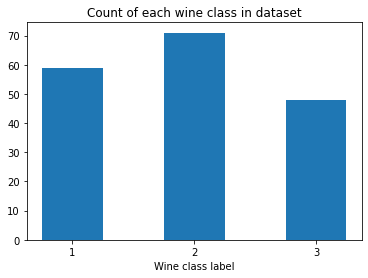

In [16]:
# Plot frequency of each wine class in the dataset

plt.bar(unique_wine, wine_class_counts, width=0.5, tick_label=[1,2,3])

# Format plot
plt.xlabel("Wine class label")
plt.title("Count of each wine class in dataset")


## Display the visualization of the Confusion Matrix.        
plt.show

### Preprocess data and convert to LibSVM format

In [17]:
# Adding count, beginning from 1, to features for each row

with_features_index = []
data_with_features_index = []

for j in range(len(wine_data)):
  each_row = wine_data[j,0:]
  
  with_features_index.append(each_row[0])

  for l in range(1,14):
    with_features_index.append(str(l)+ ":" + str(each_row[l]))
    
  data_with_features_index.append(with_features_index)  
  with_features_index = []

In [18]:
# Checking the first two rows of the data to validate format

data_with_features_index[:2]

[[1.0,
  '1:14.23',
  '2:1.71',
  '3:2.43',
  '4:15.6',
  '5:127.0',
  '6:2.8',
  '7:3.06',
  '8:0.28',
  '9:2.29',
  '10:5.64',
  '11:1.04',
  '12:3.92',
  '13:1065.0'],
 [1.0,
  '1:13.2',
  '2:1.78',
  '3:2.14',
  '4:11.2',
  '5:100.0',
  '6:2.65',
  '7:2.76',
  '8:0.26',
  '9:1.28',
  '10:4.38',
  '11:1.05',
  '12:3.4',
  '13:1050.0']]

In [19]:
# Split into train and test datasets

train_data, test_data = train_test_split(data_with_features_index, test_size=0.33, random_state=42)
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

In [20]:
# Get y_label from test data to compare against model result later

y_label = np.array(test_data[:,0], dtype=np.float32)
y_label

array([1., 1., 3., 1., 2., 1., 2., 3., 2., 3., 1., 3., 1., 2., 1., 2., 2.,
       2., 1., 2., 1., 2., 2., 3., 3., 3., 2., 2., 2., 1., 1., 2., 3., 1.,
       1., 1., 3., 3., 2., 3., 1., 2., 2., 2., 3., 1., 2., 2., 3., 1., 2.,
       1., 1., 3., 3., 2., 2., 1., 2.], dtype=float32)

In [21]:
# Size of train and test datasets

print(len(train_data))
print(len(test_data))

119
59


In [22]:
# Save train and test data to files

np.savetxt('wine_svm_train_data', train_data, delimiter=" ", fmt="%s") 
np.savetxt('wine_svm_test_data', test_data, delimiter=" ", fmt="%s") 

### Train model

In [23]:
# Pointing to SVM executables 

svmscale_exe = "libsvm/svm-scale"
svmtrain_exe = "libsvm/svm-train"
svmpredict_exe = "libsvm/svm-predict"
grid_py = "libsvm/tools/grid.py"

In [24]:
# Validate location of executables

assert os.path.exists(svmscale_exe),"svm-scale executable not found"
assert os.path.exists(svmtrain_exe),"svm-train executable not found"
assert os.path.exists(svmpredict_exe),"svm-predict executable not found"
assert os.path.exists(grid_py),"grid.py not found"

In [25]:
# Function to scale, train, and test model

def svm_model(train_pathname, test_pathname):

  # Validate that train and test files exist
  assert os.path.exists(train_pathname),"training file not found"
  file_name = os.path.split(train_pathname)[1]

  # Create files to store scaled train data, range metadata for scaled data, and trained model
  scaled_file = file_name + ".scale"
  model_file = file_name + ".model"
  range_file = file_name + ".range" # store scale range for train data to be used to scale test data

  file_name = os.path.split(test_pathname)[1]
  assert os.path.exists(test_pathname),"testing file not found"

  # Create file for scaled test data and predicted output
  scaled_test_file = file_name + ".scale"
  predict_test_file = file_name + ".predict"

  # Scaling by range [-1, 1]
  cmd = '{0} -l {4} -u {5} -s "{1}" "{2}" > "{3}"'.format(svmscale_exe, range_file, train_pathname, scaled_file, -1, 1)
  print('Scaling train data')
  Popen(cmd, shell = True, stdout = PIPE).communicate()

  # Tuning c and g hyperparameters using a 5-fold grid search
  cmd = '{0} -v {4} -svmtrain "{1}" -gnuplot "{2}" "{3}"'.format(grid_py, svmtrain_exe, "null", scaled_file, 5)
  print('Cross validation')
  f = Popen(cmd, shell = True, stdout = PIPE).stdout

  line = ''
  while True:
      last_line = line
      line = f.readline()
      if not line: break
  c,g,rate = map(float,last_line.split())

  print('Best c={0}, g={1} CV rate={2}'.format(c,g,rate))

  cmd = '{0} -c {1} -g {2} "{3}" "{4}"'.format(svmtrain_exe,c,g,scaled_file,model_file)
  print('Training model')
  Popen(cmd, shell = True, stdout = PIPE).communicate()

  print('Output model: {0}'.format(model_file))

  cmd = '{0} -l {4} -u {5} -r "{1}" "{2}" > "{3}"'.format(svmscale_exe, range_file, test_pathname, scaled_test_file, -1, 1)
  print('Scaling test data')
  Popen(cmd, shell = True, stdout = PIPE).communicate()

  cmd = '{0} "{1}" "{2}" "{3}"'.format(svmpredict_exe, scaled_test_file, model_file, predict_test_file)
  print('Testing model\n')
  f = Popen(cmd, shell = True, stdout = PIPE).stdout
  result = (str(f.readline()).replace("\\n'", '')).replace("b'", '')
  print("{} \n".format(result))

  print('Output prediction: {0}'.format(predict_test_file))

### Run model

In [26]:
# Read in train and test files saved earlier

wine_svm_data_train_file = os.path.join(os.getcwd(),'wine_svm_train_data')
wine_svm_data_test_file = os.path.join(os.getcwd(),'wine_svm_test_data')

In [27]:
# Predict on test data using model trained on train data

svm_model(wine_svm_data_train_file, wine_svm_data_test_file)

Scaling train data
Cross validation
Best c=2048.0, g=0.00048828125 CV rate=97.479
Training model
Output model: wine_svm_train_data.model
Scaling test data
Testing model

Accuracy = 98.3051% (58/59) (classification) 

Output prediction: wine_svm_test_data.predict


### Evaluate model performance

In [28]:
def evaluate_model(y_label, predict_test_file):


  # Creating the y_label for the confusion matrix
  f=open(predict_test_file,'r')
  y_pred = np.genfromtxt(f,dtype = 'float')

  # Confusion matrix
  cf_matrix = confusion_matrix(y_label, y_pred)

  # Plot heatmap
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
          fmt='.2%', cmap='Blues')

  # Format plot
  ax.set_title('Seaborn Confusion Matrix with wine class labels\n\n');
  ax.set_xlabel('\nPredicted action')
  ax.set_ylabel('Actual action ');

  # Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['1', '2', '3'])
  ax.yaxis.set_ticklabels(['1', '2', '3'])

  # Display the visualization of the Confusion Matrix.
  plt.show()

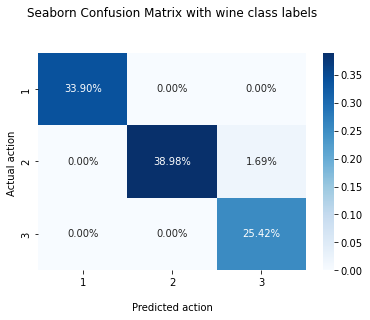

In [29]:
evaluate_model(y_label, 'wine_svm_test_data.predict')